# [TEMPLATE] DATASET DEPURADO

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [15]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [88]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'
otro = '#FAEFBF'

<hr>

# Analisis de las diferentes distribuciones de las variables

In [17]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [18]:
df = df[['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
         'metroscubiertos', 'metrostotales', 'fecha', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
         'centroscomercialescercanos', 'precio']]

### Distribucion segun tipo de propiedad

In [161]:
p1 = df.copy()
p1 = p1[['tipodepropiedad']]
conservar = ['Casa', 'Apartamento', 'Casa en condominio', 'Terreno']
p1['tipodepropiedad'] = p1['tipodepropiedad'].map(lambda x: x if x in conservar else 'Otros')
p1 = p1['tipodepropiedad'].value_counts(normalize=True).map(lambda x: round(x*100)).to_frame()\
    .reset_index().rename(columns={'index':'tipodepropiedad','tipodepropiedad':'porcentual'})

In [162]:
p1.head()

,tipodepropiedad,porcentual
0,Casa,59
1,Apartamento,24
2,Casa en condominio,8
3,Otros,5
4,Terreno,4


In [163]:
p1['label'] = p1['tipodepropiedad'] + " "
p1['label'] += "(" + p1['porcentual'].map(lambda x: str(x)) + "%)"

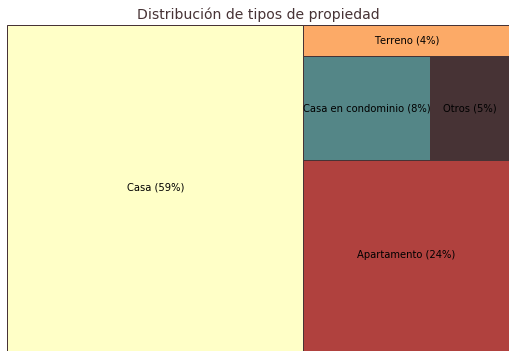

In [225]:

plt.figure(figsize=(9,6))
squarify.plot(sizes=p1['porcentual'], label=p1['label'],
              color=[verde, rojo, azul, marron, amarillo], edgecolor=marron)
plt.title('Distribución de tipos de propiedad', fontsize=14, c=marron)
plt.axis('off')

plt.savefig('distribucion tipos propiedad 2.png', transparent=True, bbox_inches='tight')

### Distribucion segun provincia

In [231]:
p2 = df.copy()
p2 = p2[['tipodepropiedad']]
conservar = ['Casa', 'Apartamento', 'Casa en condominio', 'Terreno', 'Edificio', 'Local Comercial', 'Oficina comercial']
p2['tipodepropiedad'] = p2['tipodepropiedad'].map(lambda x: x if x in conservar else 'Otros')
p2 = p2['tipodepropiedad'].value_counts(normalize=True).map(lambda x: round(x*100)).to_frame()\
    .reset_index().rename(columns={'index':'tipodepropiedad','tipodepropiedad':'porcentual'})

In [232]:
p2['label'] = p2['tipodepropiedad'] + " "
p2['label'] += "(" + p2['porcentual'].map(lambda x: str(x)) + "%)"

In [233]:
p2

,tipodepropiedad,porcentual,label
0,Casa,59,Casa (59%)
1,Apartamento,24,Apartamento (24%)
2,Casa en condominio,8,Casa en condominio (8%)
3,Terreno,4,Terreno (4%)
4,Otros,2,Otros (2%)
5,Local Comercial,1,Local Comercial (1%)
6,Oficina comercial,1,Oficina comercial (1%)
7,Edificio,1,Edificio (1%)


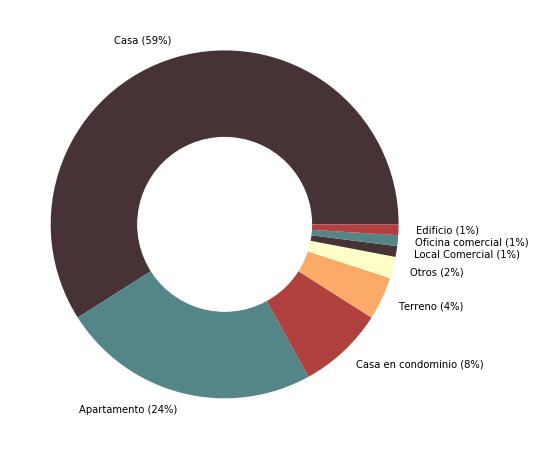

In [234]:
plt.figure(figsize=(8,8))


my_circle=plt.Circle( (0,0), 0.5, color='white')

plt.pie(p2['porcentual'], labels=p2['label'], colors=[marron, azul, rojo, amarillo, verde])
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig('distribucion tipos propiedad.png', transparent=True, bbox_inches='tight')
